In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('le2_classes.npy',allow_pickle=True)

# **Long Short-Term Memory Classifier (Binary Classification)**

In [ ]:
# importing library for LSTM layers
from keras.layers import LSTM

In [ ]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 93, 50)            10400     
_________________________________________________________________
dense_1 (Dense)              (None, 93, 1)             51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 29s 2s/step - loss: 0.6915 - accuracy: 0.5119 - val_loss: 0.6863 - val_accuracy: 0.5798
Epoch 2/100
16/16 [==============================] - 26s 2s/step - loss: 0.6487 - accuracy: 0.6194 - val_loss: 0.4693 - val_accuracy: 0.8163
Epoch 3/100
16/16 [==============================] - 25s 2s/step - loss: 0.4611 - accuracy: 0.8119 - val_loss: 0.4278 - val_accuracy: 0.8231
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.4374 - accuracy: 0.8158 - val_loss: 0.4351 - val_accuracy: 0.8118
Epoch 5/100
16/16 [==============================] - 25s 2s/step - loss: 0.4359 - accuracy: 0.8105 - val_loss: 0.4117 - val_accuracy: 0.8281
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.4162 - accuracy: 0.8260 - val_loss: 0.4076 - val_accuracy: 0.8300
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 0.4156 - accuracy: 0.8265 - val_loss: 0.4064 - val_accuracy: 0.8305
Epoch 8/100
1

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 10s 10ms/step - loss: 0.3087 - accuracy: 0.8306
Test results - Loss: 0.3086586892604828 - Accuracy: 83.05730819702148%


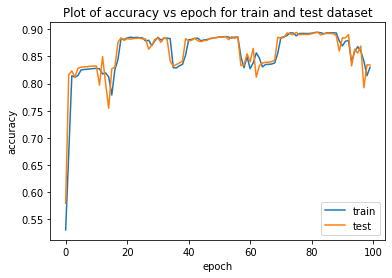

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

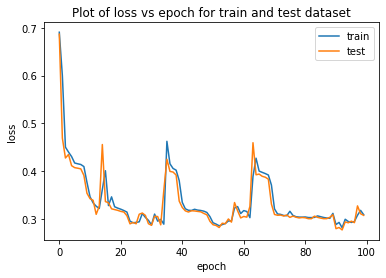

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

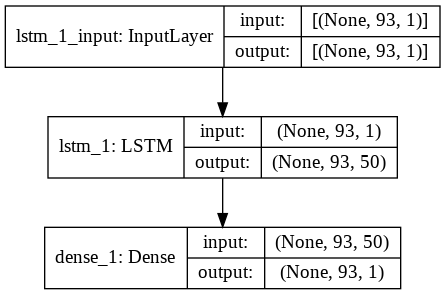

In [ ]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)